First We mport all the modules we are going to use.

In [1]:
import IPython
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython import get_ipython
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [5]:
data = pd.read_csv("Crop_recommendation (1).csv")

In [ ]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [6]:
data.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [7]:
data.shape

(2200, 8)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [9]:
data.isnull().sum()

,0
N,0
P,0
K,0
temperature,0
humidity,0
ph,0
rainfall,0
label,0


In [10]:
data.duplicated().sum()

np.int64(0)

In [11]:
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [12]:
data.nunique()

,0
N,137
P,117
K,73
temperature,2200
humidity,2200
ph,2200
rainfall,2200
label,22


In [13]:
data['label'].value_counts()

,count
label,
rice,100
maize,100
chickpea,100
kidneybeans,100
pigeonpeas,100
mothbeans,100
mungbean,100
blackgram,100
lentil,100


In [14]:
crop_summary = pd.pivot_table(data, index=['label'], aggfunc='mean')

In [ ]:
crop_summary

,K,N,P,humidity,ph,rainfall,temperature
label,,,,,,,
apple,199.89,20.80,134.22,92.333383,5.929663,112.654779,22.630942
banana,50.05,100.23,82.01,80.358123,5.983893,104.626980,27.376798
blackgram,19.24,40.02,67.47,65.118426,7.133952,67.884151,29.973340
chickpea,79.92,40.09,67.79,16.860439,7.336957,80.058977,18.872847
coconut,30.59,21.98,16.93,94.844272,5.976562,175.686646,27.409892
coffee,29.94,101.20,28.74,58.869846,6.790308,158.066295,25.540477
cotton,19.56,117.77,46.24,79.843474,6.912675,80.398043,23.988958
grapes,200.11,23.18,132.53,81.875228,6.025937,69.611829,23.849575
jute,39.99,78.40,46.86,79.639864,6.732778,174.792798,24.958376


In [15]:
import plotly.express as px

In [16]:
fig = px.box(data, y= "N",points="all")
fig.show()

In [17]:
fig = px.box(data, y= "P",points="all")
fig.show()

In [18]:
fig = px.box(data, y= "K",points="all")
fig.show()

In [19]:
fig = px.box(data, y= "temperature",points="all")
fig.show()

In [20]:
fig = px.box(data, y= "humidity",points="all")
fig.show()

In [21]:
fig = px.box(data, y= "ph",points="all")
fig.show()

In [22]:
fig = px.box(data, y= "rainfall",points="all")
fig.show()

In [23]:
df_mydata = data
df_mydata.columns = df_mydata.columns
df_mydata.head()

#DETECTION
#IQR
Q1 = df_mydata['rainfall'].quantile(0.25)
Q3 = df_mydata['rainfall'].quantile(0.75)
IQR = Q3 - Q1

# Identify the outliers
upper = df_mydata[df_mydata['rainfall'] > (Q3 + 1.5 * IQR)].index
lower = df_mydata[df_mydata['rainfall'] < (Q1 - 1.5 * IQR)].index

# Removing the outliers
df_mydata.drop(upper, inplace=True)
df_mydata.drop(lower, inplace=True)

print("New Shape: ", df_mydata.shape)

New Shape:  (2100, 8)


In [24]:
Q1 = df_mydata['temperature'].quantile(0.25)
Q3 = df_mydata['temperature'].quantile(0.75)
IQR = Q3 - Q1

# Identify the outliers
upper = df_mydata[df_mydata['temperature'] > (Q3 + 1.5 * IQR)].index
lower = df_mydata[df_mydata['temperature'] < (Q1 - 1.5 * IQR)].index

# Removing the outliers
df_mydata.drop(upper, inplace=True)
df_mydata.drop(lower, inplace=True)

print("New Shape: ", df_mydata.shape)

New Shape:  (2020, 8)


In [25]:
Q1 = df_mydata['ph'].quantile(0.25)
Q3 = df_mydata['ph'].quantile(0.75)
IQR = Q3 - Q1

# Identify the outliers
upper = df_mydata[df_mydata['ph'] > (Q3 + 1.5 * IQR)].index
lower = df_mydata[df_mydata['ph'] < (Q1 - 1.5 * IQR)].index

# Removing the outliers
df_mydata.drop(upper, inplace=True)
df_mydata.drop(lower, inplace=True)

print("New Shape: ", df_mydata.shape)

New Shape:  (1963, 8)


In [26]:
Q1 = df_mydata['P'].quantile(0.25)
Q3 = df_mydata['P'].quantile(0.75)
IQR = Q3 - Q1

# Identify the outliers
upper = df_mydata[df_mydata['P'] > (Q3 + 1.5 * IQR)].index
lower = df_mydata[df_mydata['P'] < (Q1 - 1.5 * IQR)].index

# Removing the outliers
df_mydata.drop(upper, inplace=True)
df_mydata.drop(lower, inplace=True)

print("New Shape: ", df_mydata.shape)

New Shape:  (1868, 8)


In [27]:
Q1 = df_mydata['K'].quantile(0.25)
Q3 = df_mydata['K'].quantile(0.75)
IQR = Q3 - Q1

# Identify the outliers
upper = df_mydata[df_mydata['K'] > (Q3 + 1.5 * IQR)].index
lower = df_mydata[df_mydata['K'] < (Q1 - 1.5 * IQR)].index

# Removing the outliers
df_mydata.drop(upper, inplace=True)
df_mydata.drop(lower, inplace=True)

print("New Shape: ", df_mydata.shape)

New Shape:  (1797, 8)


In [28]:
crop_summary

,K,N,P,humidity,ph,rainfall,temperature
label,,,,,,,
apple,199.89,20.80,134.22,92.333383,5.929663,112.654779,22.630942
banana,50.05,100.23,82.01,80.358123,5.983893,104.626980,27.376798
blackgram,19.24,40.02,67.47,65.118426,7.133952,67.884151,29.973340
chickpea,79.92,40.09,67.79,16.860439,7.336957,80.058977,18.872847
coconut,30.59,21.98,16.93,94.844272,5.976562,175.686646,27.409892
coffee,29.94,101.20,28.74,58.869846,6.790308,158.066295,25.540477
cotton,19.56,117.77,46.24,79.843474,6.912675,80.398043,23.988958
grapes,200.11,23.18,132.53,81.875228,6.025937,69.611829,23.849575
jute,39.99,78.40,46.86,79.639864,6.732778,174.792798,24.958376


In [29]:
crop_summary_new = crop_summary.reset_index()

In [30]:
crop_summary_new

,label,K,N,P,humidity,ph,rainfall,temperature
0,apple,199.89,20.80,134.22,92.333383,5.929663,112.654779,22.630942
1,banana,50.05,100.23,82.01,80.358123,5.983893,104.626980,27.376798
2,blackgram,19.24,40.02,67.47,65.118426,7.133952,67.884151,29.973340
3,chickpea,79.92,40.09,67.79,16.860439,7.336957,80.058977,18.872847
4,coconut,30.59,21.98,16.93,94.844272,5.976562,175.686646,27.409892
5,coffee,29.94,101.20,28.74,58.869846,6.790308,158.066295,25.540477
6,cotton,19.56,117.77,46.24,79.843474,6.912675,80.398043,23.988958
7,grapes,200.11,23.18,132.53,81.875228,6.025937,69.611829,23.849575
8,jute,39.99,78.40,46.86,79.639864,6.732778,174.792798,24.958376
9,kidneybeans,20.05,20.75,67.54,21.605357,5.749411,105.919778,20.115085


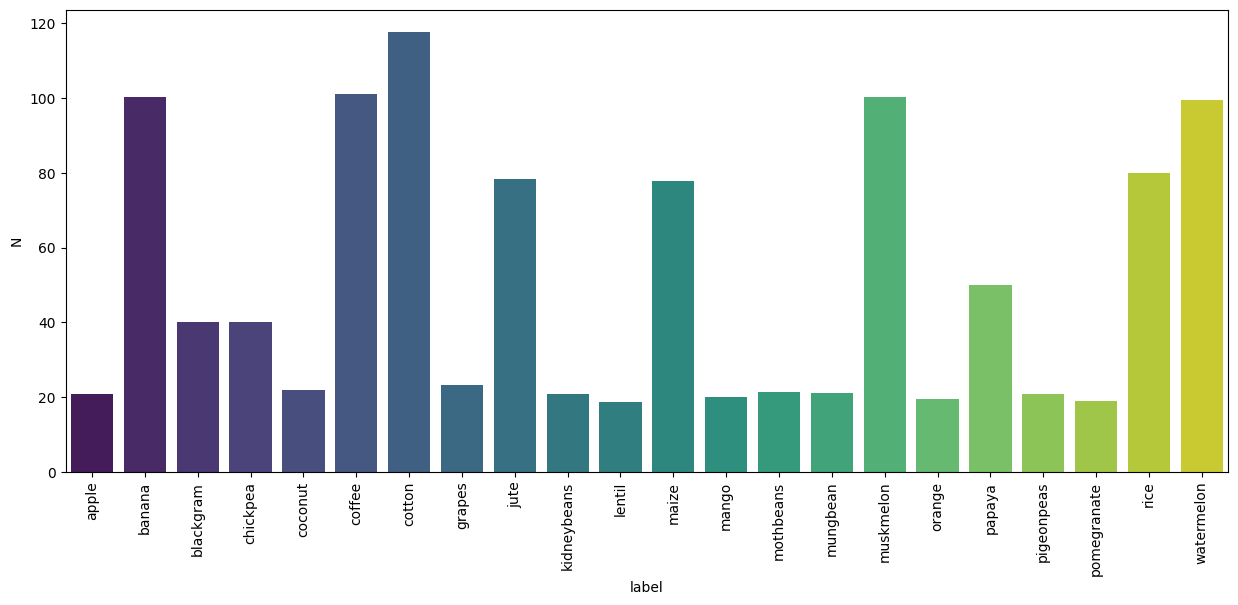

In [31]:
plt.figure(figsize=(15,6))
sns.barplot(y='N', x='label', data=crop_summary_new, palette='viridis')
plt.xticks(rotation = 90)
plt.show()

In [32]:
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [33]:
fig1 = px.bar(crop_summary_new, x='label', y='N')
fig1.show()

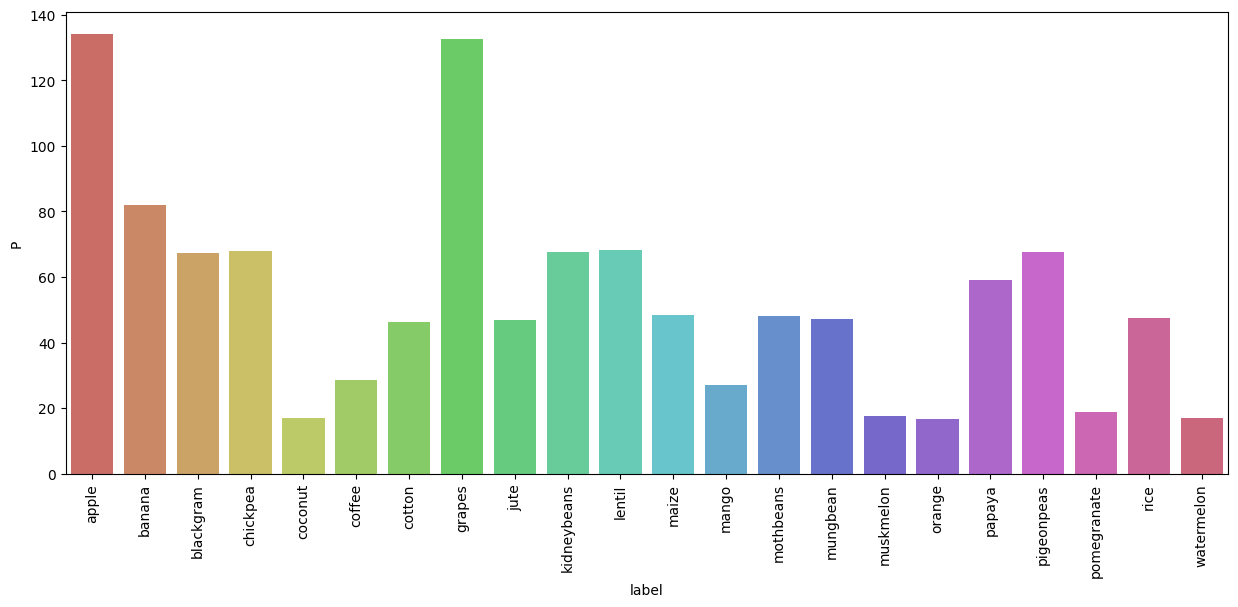

In [34]:
plt.figure(figsize=(15,6))
sns.barplot(y = 'P', x = 'label', data=crop_summary_new, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

In [35]:
fig2 = px.bar(crop_summary_new, x='label', y='P')
fig2.show()

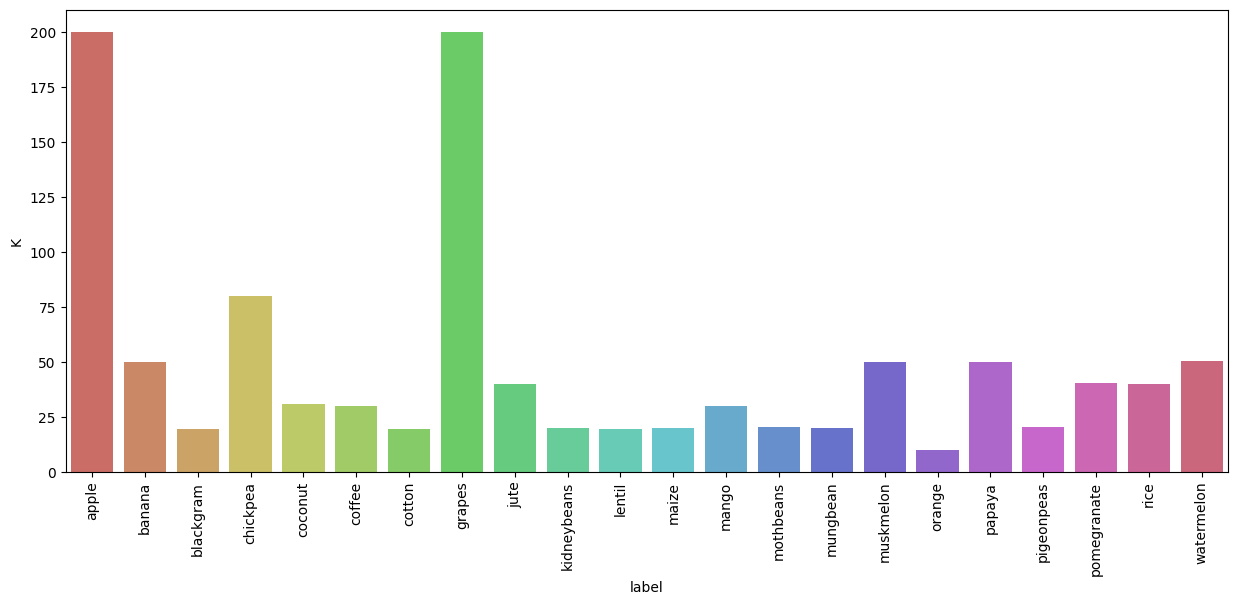

In [36]:
plt.figure(figsize=(15,6))
sns.barplot(y = 'K', x = 'label', data=crop_summary_new, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

In [37]:
fig3 = px.bar(crop_summary_new, x='label', y='K')
fig3.show()

In [38]:
import random

In [39]:
import random
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Define colorarr with a list of colors
colorarr = ['red', 'green', 'blue', 'yellow', 'orange', 'purple']

crop_summary_N = crop_summary.sort_values(by='N', ascending=False)

fig = make_subplots(rows=1, cols=2)

top = {
    'y': crop_summary_N['N'][0:10].sort_values().index,
    'x': crop_summary_N['N'][0:10].sort_values()
}

last = {
    'y': crop_summary_N['N'][-10:].index,
    'x': crop_summary_N['N'][-10:]
}

fig.add_trace(
    go.Bar(top,
           name="Most nitrogen required",
           marker_color=random.choice(colorarr),  # Now colorarr is defined
           orientation='h',
           text=top['x']),
    row=1, col=1
)

fig.add_trace(
    go.Bar(last,
           name="Least nitrogen required",
           marker_color=random.choice(colorarr),  # Now colorarr is defined
           orientation='h',
           text=last['x']),
    row=1, col=2
)
fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(title_text="Nitrogen (N)",
                  plot_bgcolor='white',
                  font_size=7,
                  font_color='black',
                  height=500)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [40]:
import random
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Define colorarr within the current code block:
colorarr = ['red', 'green', 'blue', 'yellow', 'orange', ]

crop_summary_P = crop_summary.sort_values(by='P', ascending=False)

fig = make_subplots(rows=1, cols=2)

top = {
    'y': crop_summary_P['P'][0:10].sort_values().index,
    'x': crop_summary_P['P'][0:10].sort_values()
}

last = {
    'y': crop_summary_P['P'][-10:].index,
    'x': crop_summary_P['P'][-10:]
}

fig.add_trace(
    go.Bar(top,
           name="Most phosphorus required",
           marker_color=random.choice(colorarr), # colorarr is now defined
           orientation='h',
           text=top['x']),
    row=1, col=1
)

fig.add_trace(
    go.Bar(last,
           name="Least phosphorus required",
           marker_color=random.choice(colorarr), # colorarr is now defined
           orientation='h',
           text=last['x']),
    row=1, col=2
)
fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(title_text="Phosphorus (P)",
                  plot_bgcolor='white',
                  font_size=7,
                  font_color='black',
                  height=500)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [41]:
import random
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Define colorarr within the current code block:
colorarr = ['red', 'green', 'blue', 'yellow', 'orange', 'purple']

crop_summary_K = crop_summary.sort_values(by='K', ascending=False)

fig = make_subplots(rows=1, cols=2)

top = {
    'y': crop_summary_K['K'][0:10].sort_values().index,
    'x': crop_summary_K['K'][0:10].sort_values()
}

last = {
    'y': crop_summary_K['K'][-10:].index,
    'x': crop_summary_K['K'][-10:]
}

fig.add_trace(
    go.Bar(top,
           name="Most potassium required",
           marker_color=random.choice(colorarr),  # Now colorarr is defined
           orientation='h',
           text=top['x']),
    row=1, col=1
)

fig.add_trace(
    go.Bar(last,
           name="Least potassium required",
           marker_color=random.choice(colorarr),  # Now colorarr is defined
           orientation='h',
           text=last['x']),
    row=1, col=2
)
fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(title_text="Potassium (K)",
                  plot_bgcolor='white',
                  font_size=7,
                  font_color='black',
                  height=500)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [42]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Bar(
    x=crop_summary.index,
    y=crop_summary['N'],
    name='Nitrogen',
    marker_color='#007bff'  # Blue
))
fig.add_trace(go.Bar(
    x=crop_summary.index,
    y=crop_summary['P'],
    name='Phosphorous',
    marker_color='#28a745'  # Green
))
fig.add_trace(go.Bar(
    x=crop_summary.index,
    y=crop_summary['K'],
    name='Potash',
    marker_color='#dc3545'  # Red
))

fig.update_layout(
    title="N, P, K values comparison between crops",
    plot_bgcolor='white',
    barmode='group',
    xaxis_tickangle=-45,
    font=dict(family='Arial', size=12, color='black'),  # Updated font
    xaxis=dict(title='Crops', linecolor='gray'),  # Updated x-axis
    yaxis=dict(title='Nutrient Value', linecolor='gray'),  # Updated y-axis
    legend=dict(x=0.85, y=1.05, bgcolor='rgba(255, 255, 255, 0.8)')  # Updated legend
)

fig.show()

In [43]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

labels = ['Nitrogen(N)','Phosphorous(P)','Potash(K)']
colors = ['#007bff', '#28a745', '#dc3545']  # Blue, Green, Red

fig = make_subplots(rows=1, cols=5, specs=[[{'type':'domain'}, {'type':'domain'},
                                            {'type':'domain'}, {'type':'domain'},
                                            {'type':'domain'}]])

rice_npk = crop_summary[crop_summary.index=='rice']
values = [rice_npk['N'][0], rice_npk['P'][0], rice_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Rice", marker_colors=colors),1, 1)

cotton_npk = crop_summary[crop_summary.index=='cotton']
values = [cotton_npk['N'][0], cotton_npk['P'][0], cotton_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Cotton", marker_colors=colors),1, 2)

jute_npk = crop_summary[crop_summary.index=='jute']
values = [jute_npk['N'][0], jute_npk['P'][0], jute_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Jute", marker_colors=colors),1, 3)

maize_npk = crop_summary[crop_summary.index=='maize']
values = [maize_npk['N'][0], maize_npk['P'][0], maize_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Maize", marker_colors=colors),1, 4)

lentil_npk = crop_summary[crop_summary.index=='lentil']
values = [lentil_npk['N'][0], lentil_npk['P'][0], lentil_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Lentil", marker_colors=colors),1, 5)

fig.update_traces(hole=.4, hoverinfo="label+percent+name")
fig.update_layout(
    title_text="NPK ratio for rice, cotton, jute, maize, lentil",
    annotations=[dict(text='Rice',x=0.06,y=0.8, font_size=7, showarrow=False),
                 dict(text='Cotton',x=0.26,y=0.8, font_size=7, showarrow=False),
                 dict(text='Jute',x=0.50,y=0.8, font_size=7, showarrow=False),
                 dict(text='Maize',x=0.74,y=0.8, font_size=7, showarrow=False),
                dict(text='Lentil',x=0.94,y=0.8, font_size=7, showarrow=False)])
fig.show()

In [44]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Labels and colors
labels = ['Nitrogen(N)', 'Phosphorous(P)', 'Potash(K)']
cafe_colors = ['rgb(255, 128, 0)', 'rgb(0, 153, 204)', 'rgb(173, 173, 133)']

# Fruits to display
fruits = ['apple', 'banana', 'grapes', 'orange', 'mango',
          'coconut', 'papaya', 'pomegranate', 'watermelon', 'muskmelon']

# Create a 2x5 grid of pie charts
specs = [[{'type': 'domain'}]*5, [{'type': 'domain'}]*5]
fig = make_subplots(rows=2, cols=5, specs=specs)

# Add pie charts for each fruit
for i, fruit in enumerate(fruits):
    row = i // 5 + 1
    col = i % 5 + 1
    fruit_npk = crop_summary.loc[fruit]
    values = [fruit_npk['N'], fruit_npk['P'], fruit_npk['K']]
    fig.add_trace(go.Pie(labels=labels, values=values, name=fruit.capitalize(),
                         marker_colors=cafe_colors), row, col)

# Add annotations
annotations = []
for i, fruit in enumerate(fruits):
    x = 0.06 + (i % 5) * 0.20
    y = 1.08 if i < 5 else 0.46
    annotations.append(dict(text=fruit.capitalize(), x=x, y=y, font_size=7, showarrow=False))

# Update layout
fig.update_layout(
    title_text="NPK ratio for fruits",
    annotations=annotations
)

fig.show()


In [45]:
import plotly.express as px

# Define crops of interest
selected_crops = ['rice', 'jute', 'cotton', 'maize', 'lentil']

# Filter data using .isin() for cleaner syntax
crop_scatter = data[data['label'].isin(selected_crops)]

# Define a custom color palette
custom_colors = ['#FF6F61', '#6B5B95', '#88B04B', '#FFA07A', '#20B2AA']  # Red, purple, green, salmon, teal

# Create scatter plot
fig = px.scatter(
    crop_scatter,
    x="temperature",
    y="humidity",
    color="label",
    symbol="label",
    color_discrete_sequence=custom_colors,
    title="Temperature vs Humidity for Selected Crops"
)

# Update layout with cleaner visual aesthetics
fig.update_layout(
    plot_bgcolor='#f7f7f7',
    paper_bgcolor='white',
    title_font_size=18,
    legend_title_text='Crop Type',
    legend=dict(bordercolor="Black", borderwidth=1),
    font=dict(family="Arial", size=12),
)

# Show grid
fig.update_xaxes(showgrid=True, gridcolor='lightgrey')
fig.update_yaxes(showgrid=True, gridcolor='lightgrey')

# Display plot
fig.show()


In [46]:
import plotly.express as px

# Define columns to compare
climate_factors = ["rainfall", "temperature", "humidity"]

# Create the bar chart
fig = px.bar(
    crop_summary,
    x=crop_summary.index,
    y=climate_factors,
    title="Comparison of Rainfall, Temperature, and Humidity by Crop",
    color_discrete_sequence=['#1f77b4', '#ff7f0e', '#2ca02c']  # Blue, Orange, Green
)

# Update layout for a cleaner appearance
fig.update_layout(
    plot_bgcolor='#f9f9f9',
    paper_bgcolor='white',
    height=500,
    font=dict(family="Verdana", size=12),
    legend_title_text="Climate Factor",
    title_font_size=18
)

# Turn off gridlines
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

# Show the plot
fig.show()


In [47]:
# Select only the numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Now compute the correlation
correlation_matrix = numeric_data.corr()
print(correlation_matrix)

                    N         P         K  temperature  humidity        ph  \
N            1.000000 -0.091462  0.297630    -0.010448  0.268390  0.085726   
P           -0.091462  1.000000 -0.002644    -0.092271 -0.482724  0.008555   
K            0.297630 -0.002644  1.000000    -0.150809 -0.058721  0.042208   
temperature -0.010448 -0.092271 -0.150809     1.000000  0.293108 -0.047769   
humidity     0.268390 -0.482724 -0.058721     0.293108  1.000000  0.102300   
ph           0.085726  0.008555  0.042208    -0.047769  0.102300  1.000000   
rainfall    -0.019316 -0.023319 -0.034850    -0.081605 -0.015037 -0.154477   

             rainfall  
N           -0.019316  
P           -0.023319  
K           -0.034850  
temperature -0.081605  
humidity    -0.015037  
ph          -0.154477  
rainfall     1.000000  


<Axes: >

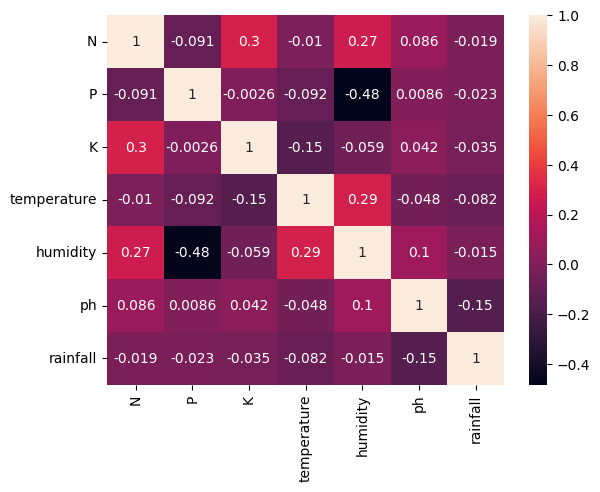

In [48]:
import seaborn as sns
sns.heatmap(correlation_matrix, annot=True, cbar=True)

In [49]:
data.label.value_counts()

,count
label,
maize,100
kidneybeans,100
mungbean,100
pigeonpeas,100
coffee,100
cotton,100
blackgram,100
lentil,100
banana,100


In [50]:
np.array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'watermelon', 'muskmelon', 'orange', 'papaya',
       'coconut', 'cotton', 'jute', 'coffee'], dtype=object)

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'watermelon', 'muskmelon', 'orange', 'papaya',
       'coconut', 'cotton', 'jute', 'coffee'], dtype=object)

In [51]:
data['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'watermelon', 'muskmelon', 'orange', 'papaya',
       'coconut', 'cotton', 'jute', 'coffee'], dtype=object)

In [52]:
X = data.drop('label', axis=1)
y = data['label']

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33,
                                                    shuffle = True, random_state = 0)

In [54]:
X_train.shape

(1203, 7)

In [55]:
y_train.shape

(1203,)

In [56]:
from sklearn.preprocessing import MinMaxScaler  # Importing MinMaxScaler from the correct module

mx = MinMaxScaler()  # Correcting typo in class name
x_train = mx.fit_transform(X_train)  # Fitting and transforming the training data
x_test = mx.transform(X_test)  # Transforming the test data using the same fitted scaler


In [57]:
X_train

,N,P,K,temperature,humidity,ph,rainfall
1606,5,23,15,25.669011,92.046708,7.408939,112.542420
647,35,48,15,27.108181,87.451267,6.981758,55.037240
2185,116,36,25,27.578476,58.525343,6.172090,156.681037
1322,120,19,49,25.794489,84.268307,6.762472,56.452292
1001,105,95,50,27.333690,83.676752,5.849076,101.049479
...,...,...,...,...,...,...,...
958,4,19,43,18.071330,93.145549,5.779427,106.360202
1441,120,23,55,27.844928,91.606666,6.732049,26.478444
2056,72,42,43,26.567673,80.904245,6.352771,181.291561
682,6,47,18,29.161746,80.280381,6.715277,40.165460


In [58]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler object
sc = StandardScaler()

# Fit the scaler to the training data and transform it
X_train = sc.fit_transform(X_train)

# Transform the test data using the same scaler
X_test = sc.transform(X_test)


In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score

In [60]:
models = {
    'LogisticRegression': LogisticRegression(),
    'GaussianNB': GaussianNB(),
    'SVC': SVC(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'BaggingClassifier': BaggingClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier()
}

In [61]:
# we now tarin each model

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    score = accuracy_score(y_test, y_pred)
    print(f"{name} model with accuracy: {score}")

LogisticRegression model with accuracy: 0.9276094276094277
GaussianNB model with accuracy: 0.98989898989899
SVC model with accuracy: 0.9713804713804713
KNeighborsClassifier model with accuracy: 0.9713804713804713
DecisionTreeClassifier model with accuracy: 0.9713804713804713
RandomForestClassifier model with accuracy: 0.9915824915824916
BaggingClassifier model with accuracy: 0.9797979797979798
GradientBoostingClassifier model with accuracy: 0.9713804713804713
AdaBoostClassifier model with accuracy: 0.32154882154882153


In [62]:
# Instantiate the RandomForestClassifier
randomclf = RandomForestClassifier()

# Fit the model on the training data
randomclf.fit(x_train, y_train)

# Predict on the test data
y_pred = randomclf.predict(x_test)

# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"RandomForestClassifier accuracy: {accuracy:.4f}")

RandomForestClassifier accuracy: 0.9899


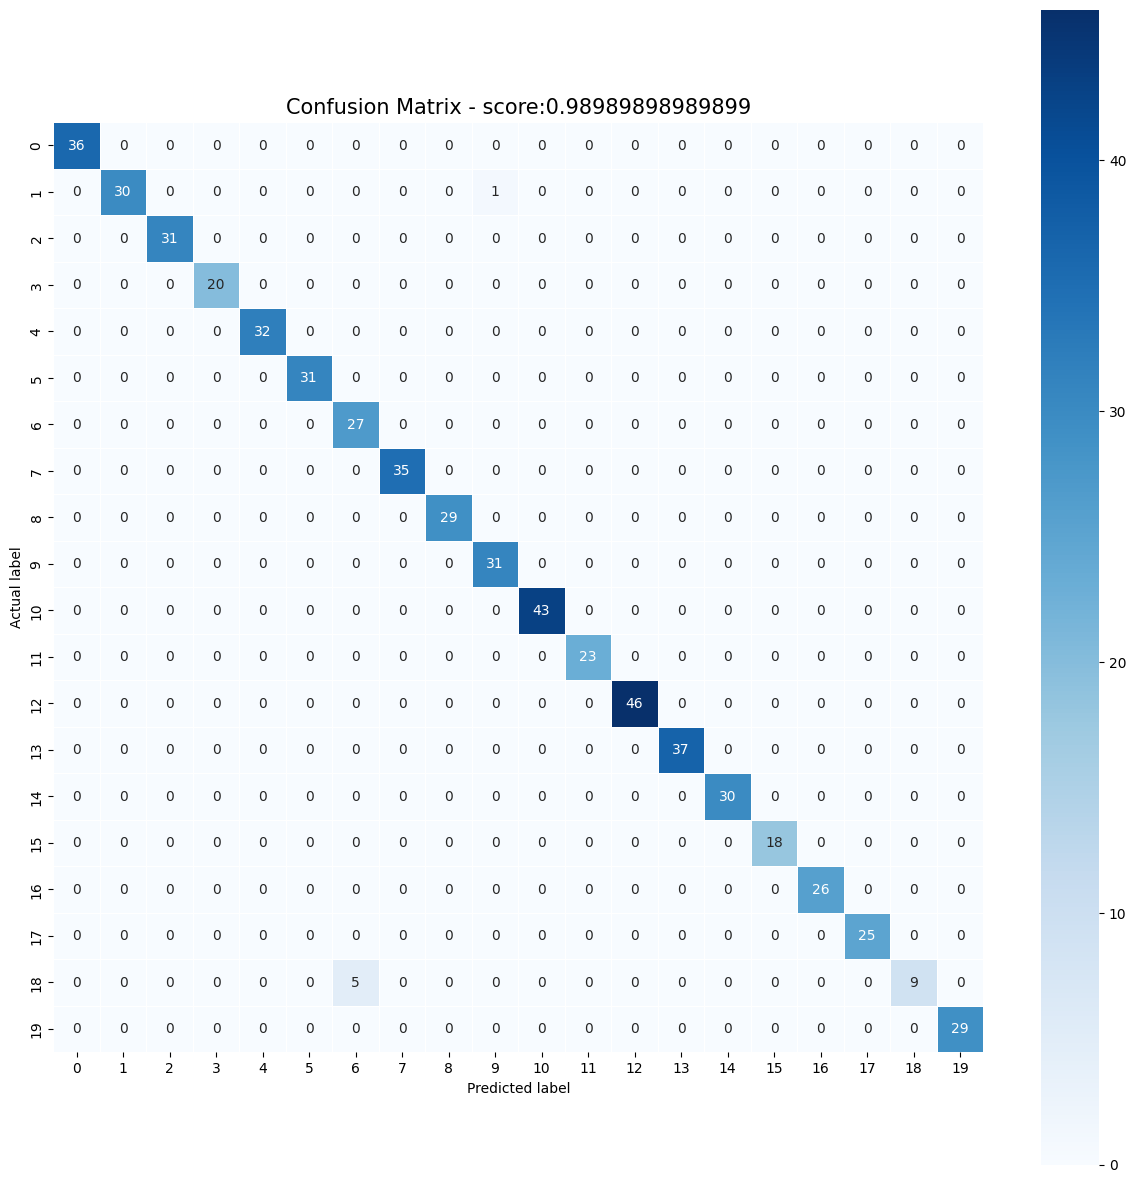

In [63]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(15,15))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()

In [64]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      banana       1.00      1.00      1.00        36
   blackgram       1.00      0.97      0.98        31
    chickpea       1.00      1.00      1.00        31
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        32
      cotton       1.00      1.00      1.00        31
        jute       0.84      1.00      0.92        27
 kidneybeans       1.00      1.00      1.00        35
      lentil       1.00      1.00      1.00        29
       maize       0.97      1.00      0.98        31
       mango       1.00      1.00      1.00        43
   mothbeans       1.00      1.00      1.00        23
    mungbean       1.00      1.00      1.00        46
   muskmelon       1.00      1.00      1.00        37
      orange       1.00      1.00      1.00        30
      papaya       1.00      1.00      1.00        18
  pigeonpeas       1.00      1.00      1.00        26
 pomegranate       1.00    

In [65]:
data.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [66]:
def recommendation(N, P, K, temperature, humidity, ph, rainfall):
    # Creating an array of the actual numeric feature values passed as arguments
    features = np.array([[N, P, K, temperature, humidity, ph, rainfall]])

    # Assuming `mx` and `sc` are MinMaxScaler instances already defined and `randomclf` is a trained model
    mx_features = mx.fit_transform(features)
    sc_mx_features = sc.fit_transform(mx_features)
    prediction = randomclf.predict(sc_mx_features).reshape(1, -1)
    return prediction[0]

In [67]:
N=90
P=42
K=43
temperature=20.879744
humidity=82.002
ph=6.5
rainfall=202.9355

predict = recommendation(N,P,K,temperature,humidity,ph,rainfall)

In [68]:
predict

array(['kidneybeans'], dtype=object)